In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("raisin_dataset.xlsx")

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.shape

(900, 8)

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

X.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred

array(['Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecim

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.86      0.75      0.80        83
     Kecimen       0.81      0.90      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



array([229], dtype=int32)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([416], dtype=int32)

In [13]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.90      0.84      0.87        83
     Kecimen       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([2164], dtype=int32)

In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="rbf"))
])

In [15]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

pipeline.named_steps['svc'].n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([382], dtype=int32)

In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="linear"))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

pipeline.named_steps['svc'].n_iter_

              precision    recall  f1-score   support

       Besni       0.90      0.84      0.87        83
     Kecimen       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([1214], dtype=int32)

In [18]:
df = pd.read_csv("weather_classification_data.csv")

In [19]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [20]:
df.shape

(13200, 11)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

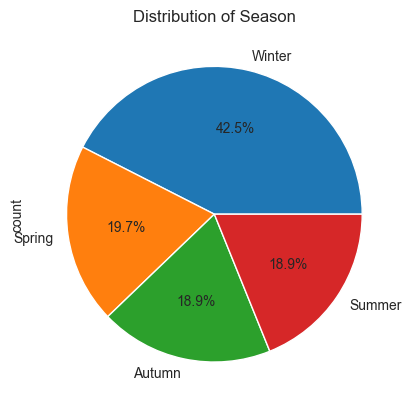

In [22]:
df['season'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Season')
plt.show()

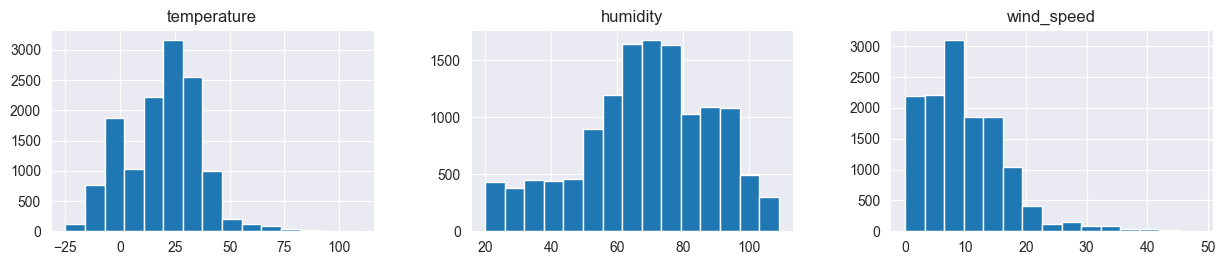

In [23]:
df[['temperature', 'humidity', 'wind_speed']].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

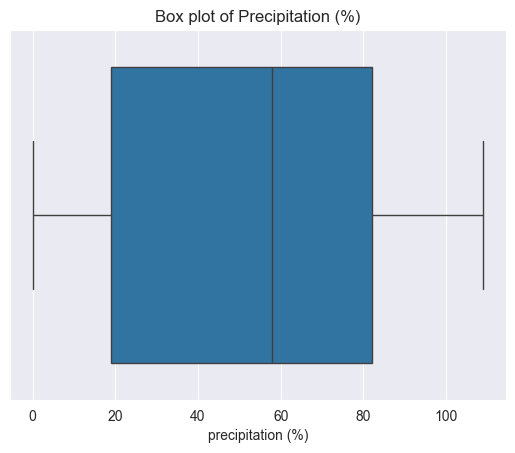

In [24]:
# Visualize precipitation (%) using a box plot
sns.boxplot(x='precipitation (%)', data=df)
plt.title('Box plot of Precipitation (%)')
plt.show()

In [25]:
df = pd.get_dummies(df, columns=['cloud_cover', 'location', 'season'], drop_first=True)

In [26]:
scaler = StandardScaler()
numerical_features = ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [27]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


In [28]:
X = df.drop('weather_type', axis=1)
y = df['weather_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

model_linear.score(X_test, y_test)

0.8845959595959596

In [30]:
y_pred_linear = model_linear.predict(X_test)

print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_linear))

[[806  82  28  39]
 [ 49 852  67  14]
 [ 26  12 974  21]
 [ 57  29  33 871]]


In [32]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

model_rbf.score(X_test, y_test)

0.9055555555555556

In [33]:
y_pred_rbf = model_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [34]:
print(confusion_matrix(y_test, y_pred_rbf))

[[843  64  24  24]
 [ 54 891  13  24]
 [ 30  14 968  21]
 [ 48  28  30 884]]


In [35]:
model_custom = SVC(kernel='rbf', C=0.5, gamma='auto', degree=2)
model_custom.fit(X_train, y_train)

model_custom.score(X_test, y_test)

0.898989898989899

In [36]:
y_pred_custom = model_custom.predict(X_test)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



In [37]:
print(confusion_matrix(y_test, y_pred_custom))

[[833  62  36  24]
 [ 50 882  31  19]
 [ 29  10 973  21]
 [ 46  30  42 872]]


In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_pipeline))

print('*' * 50)

print(confusion_matrix(y_test, y_pred_pipeline))



              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.92      0.94      0.93      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

**************************************************
[[836  64  29  26]
 [ 47 892  22  21]
 [ 30  16 971  16]
 [ 52  27  29 882]]


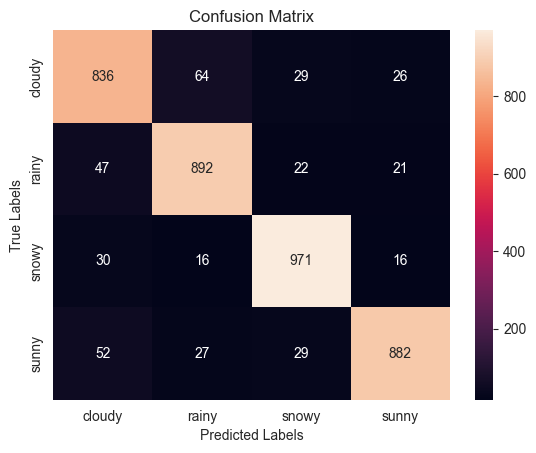

In [39]:
classes = ['cloudy', 'rainy', 'snowy', 'sunny']

cm = confusion_matrix(y_test, y_pred_pipeline)
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
df = pd.read_excel("raisin_dataset.xlsx")

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [46]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_model = LogisticRegression(max_iter=10000)
svc_model = SVC(kernel='rbf', probability=True)
dt_model = DecisionTreeClassifier()

vc = VotingClassifier(estimators=[
    ('lr', log_model),
    ('svc', svc_model),
    ('dt', dt_model)
], voting='soft')

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Besni       0.92      0.82      0.87        83
     Kecimen       0.86      0.94      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180

